<h1> Team 10: Feature Engineering Homework </h1>

Hypothesis Testing:

H0: Adding features inside the house does not add to its sale price. 

H1: Iowa land area is one of the most valuable features of a house. 

In [6]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = 'Ames Housing Dataset.xlsx'


# reading the file into Python
housing = pd.read_excel(file)


# code will not produce an output

In [7]:
for index, value in housing.iterrows():

    # Second_Flr_SF
    if housing.loc[index, 'Pool_Area' ] > 0:
        housing.loc[index, 'has_Pool_Area'] = 1
    else:
        housing.loc[index, 'has_Pool_Area'] = 0
        
    # Garage_Area
    if housing.loc[index, 'Porch_Area'] > 0:
        housing.loc[index, 'has_Porch_Area'] = 1
    else:
        housing.loc[index, 'has_Porch_Area'] = 0
        
    # Garage_Area
    if housing.loc[index, 'Garage_Area'] > 0:
        housing.loc[index, 'has_Garage_Cars'] = 1
    else:
        housing.loc[index, 'has_Garage_Cars'] = 0
    
    # Garage_Area
    if housing.loc[index, 'Garage_Cars'] > 0:
        housing.loc[index, 'has_Garage_Cars'] = 1
    else:
        housing.loc[index, 'has_Garage_Cars'] = 0
    
    # Garage_Area
    if housing.loc[index, 'Fireplaces'] > 0:
        housing.loc[index, 'has_Fireplaces'] = 1
    else:
        housing.loc[index, 'has_Fireplaces'] = 0
        
    # Garage_Area
    if housing.loc[index, 'Kitchen_AbvGr'] > 0:
        housing.loc[index, 'has_Kitchen_AbvGr'] = 1
    else:
        housing.loc[index, 'has_Kitchen_AbvGr'] = 0
    
    # Garage_Area
    if housing.loc[index, 'Second_Flr_SF'] > 0:
        housing.loc[index, 'has_Second_Flr_SF'] = 1
    else:
        housing.loc[index, 'has_Second_Flr_SF'] = 0
        
    # Mas_Vnr_Area
    if housing.loc[index, 'Mas_Vnr_Area'] > 0:
        housing.loc[index, 'has_Mas_Vnr'] = 1
    else:
        housing.loc[index, 'has_Mas_Vnr'] = 0

    #Full Bath and Fireplace
    if housing.loc[index, 'Fireplaces'] > 0 and housing.loc[index, 'Full_Bath'] > 0:
        housing.loc[index, 'has_Fireplaces and Full_Bath'] = 1
    else:
        housing.loc[index, 'has_Fireplaces and Full_Bath'] = 0

    
    #Full Bath and Fireplace
    if housing.loc[index, 'Full_Bath'] > 0:
        housing.loc[index, 'has_Full_Bath'] = 1
    else:
        housing.loc[index, 'has_Full_Bath'] = 0
    
        #Full Bath and Fireplace
    housing.loc[index, 'Gr_Liv_Area + Garage_Area'] = housing.loc[index, 'Gr_Liv_Area'] + housing.loc[index, 'Garage_Area']
    housing.loc[index, 'Overall_Qual + Overall_Cond'] = housing.loc[index, 'Overall_Qual'] + housing.loc[index, 'Overall_Cond']

In [12]:
continuous_data = ["Overall_Qual",
                   "Overall_Cond",
                   "Overall_Qual + Overall_Cond",
                   "Garage_Area",
                   "Gr_Liv_Area",
                   "Gr_Liv_Area + Garage_Area",
                   "Sale_Price","Gr_Liv_Area + Garage_Area",
                   "Fireplaces",
                   "Full_Bath"]


# instantiating a correlation matrix
df_corr = housing[continuous_data].corr().round(2)


In [ ]:
# creating a list of continuous features (including Sale_Price)
continuous_data = ["Overall_Qual",
                   "Overall_Cond",
                   "Overall_Qual + Overall_Cond",
                   "Garage_Area",
                   "Gr_Liv_Area",
                   "Gr_Liv_Area + Garage_Area",
                   "Sale_Price","Gr_Liv_Area + Garage_Area",
                   "Fireplaces",
                   "Full_Bath"]


# developing a correlation matrix based on continuous features
housing_corr = housing[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
housing_corr.loc[:,"Sale_Price"].round(decimals = 2).sort_values(ascending = False)

In [16]:
# creating a list of continuous features (including Sale_Price)
continuous_data = ["Overall_Qual + Overall_Cond",
                   "Gr_Liv_Area + Garage_Area",
                   "has_Fireplaces and Full_Bath",
                   "Sale_Price"]


# developing a correlation matrix based on continuous features
housing_corr = housing[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
housing_corr.loc[:,"Sale_Price"].round(decimals = 2).sort_values(ascending = False)

Sale_Price                      1.00
Gr_Liv_Area + Garage_Area       0.78
Overall_Qual + Overall_Cond     0.59
has_Fireplaces and Full_Bath    0.48
Name: Sale_Price, dtype: float64

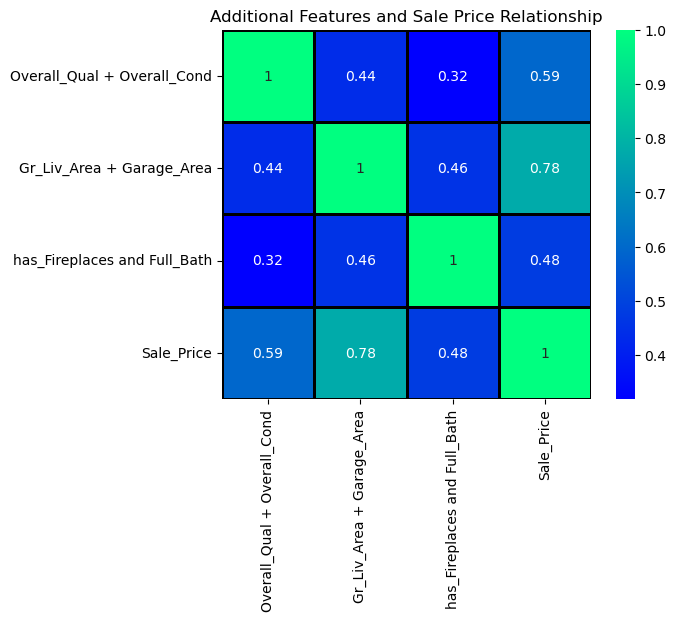

In [22]:
sns.heatmap(data = housing_corr,
            cmap = 'winter',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 1.0)
plt.title("Additional Features and Sale Price Relationship")
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Explain the Results</h3><br>
Did your engineered features have the effect that was expected? Explain in 1-2 sentences for each engineered feature.

<h2> Gr_Liv_Area + Garage_Area </h2>

To conclude, only one of the new features, Gr_Liv_Area + Garage_Area, has a strong correlation with the Sales_Price, because by combining the living and garage areas we are increasing the square footage, and therefore driving its price up. Also according to the data, living area by itself has a strong correlation with Sales_Price, so this means Iowa residents prefer larger living areas compared to other states, which reenforces our findings. 

<h2> Overall_Qual + Overall_Cond </h2>

When it comes to our new feature engineered, Overall_Qual + Overall_Cond, has a positive but not strong correlation with Sales_Price. A possible explanation for this phenomenon is the fact that Overall_Cond on its own is negatively correlated making it statistically insignificant. 

<h2> has_Fireplaces + Full_Bath </h2>

The same happens with has_Fireplaces + Full_Bath, this new feature engineered has a positive but not strong correlation with Sales_Price. This might be because these are two features that hardly affect the Sales_Price on their own, therefore they are statistically insignificant. 
